In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\Git Repo's\creditcard.csv")

In [3]:
print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
print(df.describe);

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -

In [5]:
print(df.head())
#We see that we have a Column "Class" which depicts the Fraud Transaction occurence
#We'll cut-short the DATA for better performance

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [6]:
df_cut = df.sample(frac=0.1,random_state=5)
print(df_cut.shape)

(28481, 31)


In [7]:
print(df_cut.describe)

<bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
27733    34681.0 -0.231080 -3.201858 -0.674366 -0.976167 -1.302294  0.626642   
58505    48420.0 -0.295889  2.179398 -2.701905  1.295084  0.964631 -1.468709   
231716  146896.0 -1.233770  0.550555  0.149961 -0.533041  2.583473 -0.171465   
123042   76786.0  1.192163  0.338580  0.421319  0.716534 -0.316889 -0.782785   
215839  140239.0  0.135040  0.252836  0.877346 -0.661467 -0.021139  0.146843   
156246  107637.0  1.984591 -0.184305 -0.153722  0.558171 -0.679554 -0.807009   
116798   74432.0  0.820044  0.361532 -0.876831 -0.678219 -0.436604 -1.142447   
25016    33480.0 -3.789547 -4.169888  1.250812  0.294014  4.875257 -4.039083   
39600    39897.0  1.121371 -0.286239  1.104577  0.687660 -0.893734  0.217062   
156654  108596.0 -0.409440  0.821473  1.450077 -1.065784  0.517930 -0.244133   
90908    63228.0 -2.379349  2.709490 -2.066780  0.757089 -1.109476 -0.499518   
187354

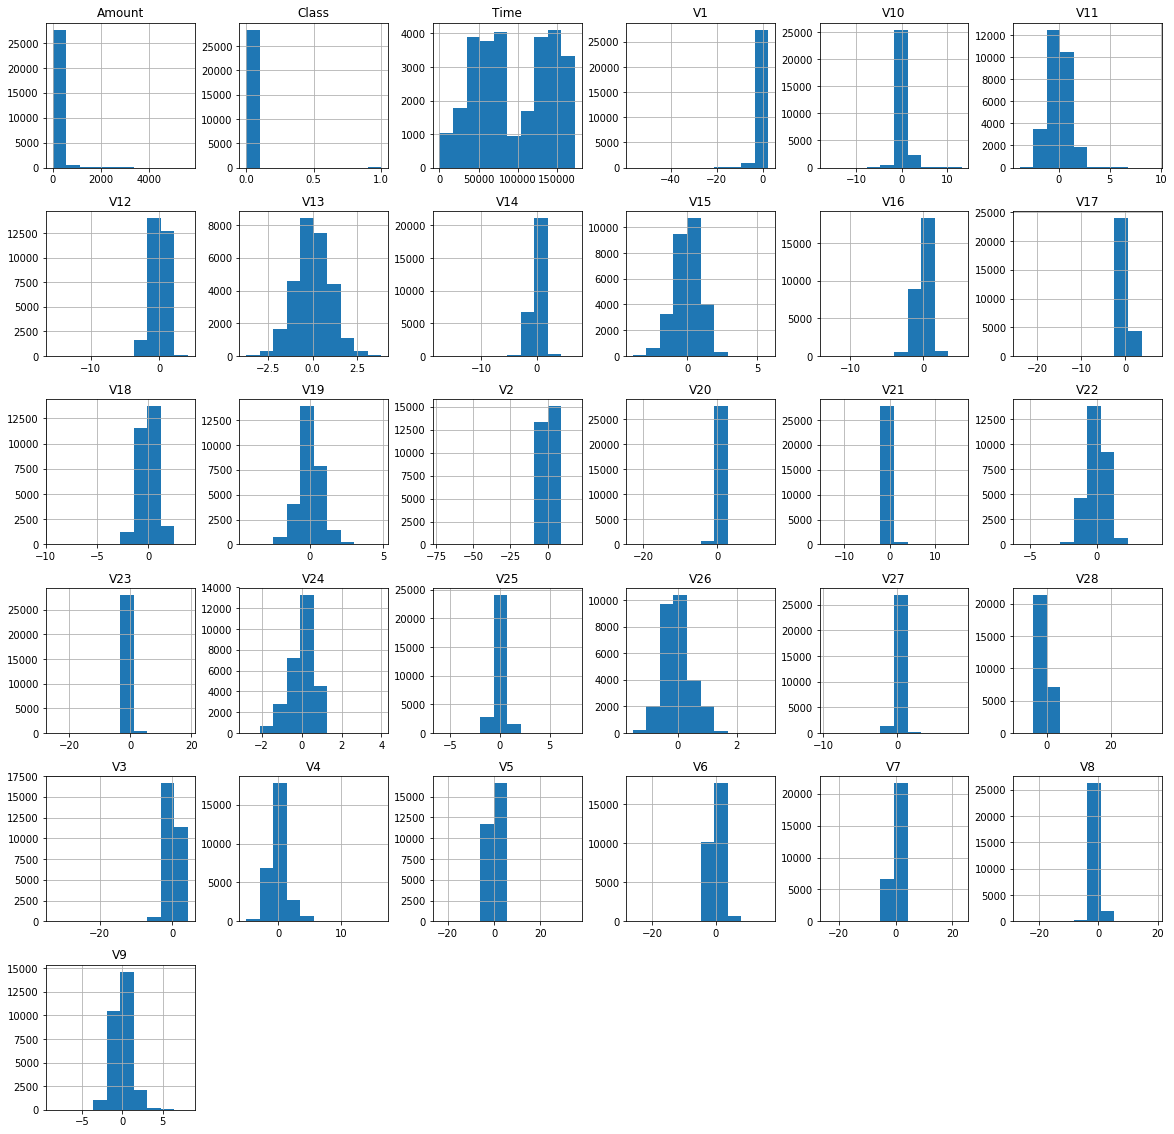

In [8]:
#Let's plot a Histogram for the data
df_cut.hist(figsize=(20,20))
plt.show()

In [9]:
#Now Let's determine the Fraud Cases in the Data Set
Fraud = df_cut[df_cut['Class']==1]
Valid = df_cut[df_cut['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print('Fraud Cases: {}'.format(len(df_cut[df_cut['Class']==1])))
print('Valid Cases: {}'.format(len(df_cut[df_cut['Class']==0])))

0.001758643733952376
Fraud Cases: 50
Valid Cases: 28431


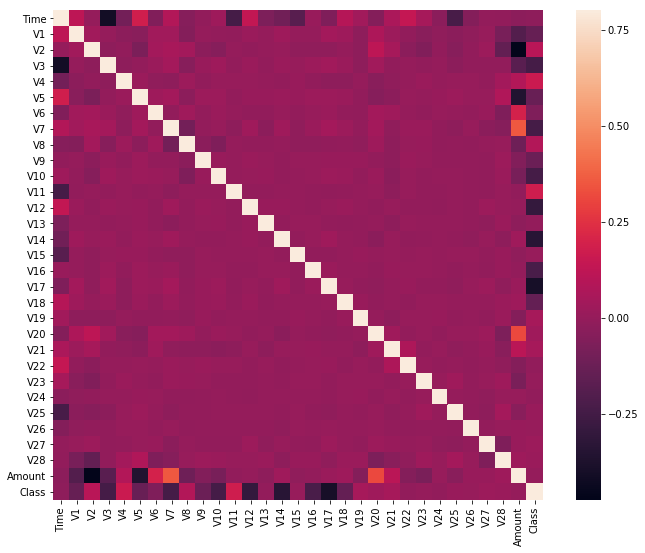

In [10]:
#Let's do a Correlation Matrix:
cormat = df_cut.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(cormat,vmax=.8,square = True)
plt.show()
#We see the there is approx 0.50 correlation between Class attribute and other attributes..!!

In [11]:
#Now prepare the Data for ML implementation

#Get all columns from Data Frame
cols = df_cut.columns.tolist()
#Filter columns we do not want
cols = [c for c in cols if c not in ['Class']]
#Store the Variable we'll be predicting on:
target = "Class"
x = df_cut[cols]
y = df_cut[target]
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [12]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#define random state
state=1

In [13]:
#Define Outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x),
                                       contamination = outlier_fraction,
                                       random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20,
                                              contamination = outlier_fraction)
}

In [14]:
#Fit the Model:
plt.figure(figsize=(9,7))
n_outlier = len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
    
    #reshape the prediction values
    y_pred[y_pred ==1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred!= y).sum()
    #Run classification metrics
    
    print("{} : {}".format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest : 59
0.9979284435237527
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28431
          1       0.41      0.42      0.42        50

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor : 99
0.9965239984551104
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28431
          1       0.02      0.02      0.02        50

avg / total       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>

In [51]:
#Thank You..!!